In [1]:
import cv2
import random
import base64
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

def show_img(img, dpi=150, title=None):
    fig, ax = plt.subplots(nrows=1, ncols=1, dpi=dpi)
    ax.set_title( title, fontsize=16, color='black')
    ax.axis('off')
    ax.imshow(img)
    return fig, ax

### pyqrcodeを使用する方法

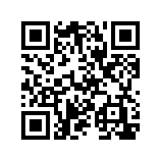

In [2]:
import pyqrcode

# 埋め込みデータ
data = f'こんにちは'

# QRコード作成
code = pyqrcode.create(content=data, error='L', version=3, mode='binary')

# 画像表示
base64_img = code.png_as_base64_str(scale=5).encode()
img = np.asarray(bytearray(base64.b64decode(base64_img)), dtype="uint8")
img = cv2.imdecode(img, cv2.IMREAD_COLOR)
show_img(img, dpi=50)

# 画像保存
output_dir = Path('output')
output_dir.mkdir(exist_ok=True)
save_file_name = 'qrcode.png'
code.png(str(output_dir/save_file_name), scale=5, module_color=[0, 0, 0, 128], background=[255, 255, 255])

### qrcodeを使用する方法

(<Figure size 300x200 with 1 Axes>, <AxesSubplot:>)

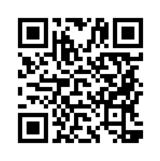

In [3]:
import qrcode

# 埋め込みデータ
data = f'こんにちは_{random.randint(0, 1000):04d}'

# QRコード作成
qr = qrcode.QRCode(
    version=3,
    error_correction=qrcode.constants.ERROR_CORRECT_M,
    box_size=20,
    border=3
)
qr.add_data(data.encode('shift_jis'))
qr.make()

pil_img = qr.make_image().convert("L").convert("RGB")
np_img = np.asarray(pil_img, np.uint8)

show_img(np_img, dpi=50)
